In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
hires = pd.read_csv("coach_hires_2019-25.csv")
num_successes = len(hires.loc[hires["success"] == "True"])
num_TBD = len(hires.loc[hires["success"] == "TBD"])
num_unsuccessful = len(hires.loc[hires["success"] == "False"])

([<matplotlib.patches.Wedge at 0x7111b062fe00>,
 [Text(-0.049351512504286627, 1.098892364252996, 'Successes'),
  Text(-0.5212552500427717, -0.9686552350051321, 'Failures'),
  Text(0.9442936478556411, -0.5641892471675499, 'TBD')])

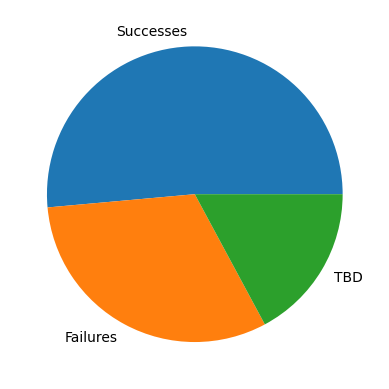

In [22]:
labels = 'Successes', 'Failures', 'TBD'
sizes = [num_successes, num_unsuccessful, num_TBD]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
